In [17]:
import sys
#import utilities that it is outside the project folder
sys.path.append("..")

from utilities import *

#silent warnings
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_excel("../data/Datos_Market_copy.xlsx")

sa = SalesAnalysis(raw_data)

data = sa.data[sa.brand35]

filtered_data = filter_data = data[
    (data["supermarket"] == "supermarket-A")
    & (data["variant"] == "standard")
    & (data["pack.size"] == "351 - 500 GR")
]

# filtered_data = filter_data = data[
#     (data["supermarket"] == "supermarket-A")
#     & (data["variant"] == "flavoured")
#     & (data["pack.size"] == "0 - 350 GR")
# ]

train_data, test_data = sa.divide_data_for_train_and_test(filtered_data)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=402.549, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=401.775, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=402.615, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=405.271, Time=0.00 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=400.469, Time=0.01 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=401.812, Time=0.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=403.729, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=402.652, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=403.052, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=401.256, Time=0.01 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=404.462, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=399.947, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=401.860, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AIC=401.812, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[12]         

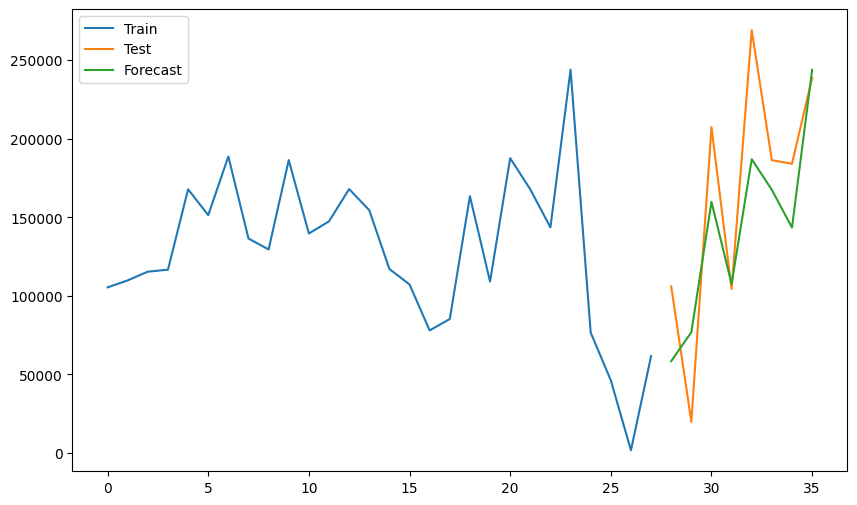

In [18]:
auto_model = sa.autoarima(train_data["volume.sales"], d=0)
print("Orden:", auto_model.order, "Estacional:", auto_model.seasonal_order)

from skforecast.sarimax import Sarimax

warnings.filterwarnings("ignore")
model = Sarimax(order=auto_model.order, seasonal_order=auto_model.seasonal_order)
model.fit(y=train_data["volume.sales"])

forecast_skforecast = model.predict(steps=len(test_data))

print("=" * 100)
print(test_data["volume.sales"].head())
print(forecast_skforecast.head())

#plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["volume.sales"], label="Train")
plt.plot(test_data.index, test_data["volume.sales"], label="Test")
plt.plot(test_data.index, forecast_skforecast, label="Forecast")
plt.legend()
plt.show()